# Data Input

To do any computation, you need to have data. Getting the data in the framework of a workflow is therefore the first step of every analysis. Nipype provides many different modules to grab or select the data:

    DataFinder
    DataGrabber
    FreeSurferSource
    JSONFileGrabber
    S3DataGrabber
    SSHDataGrabber
    SelectFiles
    XNATSource

This tutorial will only cover some of them. For the rest, see the section [``interfaces.io``](http://nipype.readthedocs.io/en/latest/interfaces/generated/nipype.interfaces.io.html) on the official homepage.

# Dataset structure

To be able to import data, you first need to be aware of the structure of your dataset. The structure of the dataset for this tutorial is according to BIDS, and looks as follows:

    ds000114
    ├── CHANGES
    ├── dataset_description.json
    ├── derivatives
    │   ├── fmriprep
    │   │   └── sub01...sub10
    │   │        └── ...
    │   ├── freesurfer
    │       ├── fsaverage
    │       ├── fsaverage5
    │   │   └── sub01...sub10
    │   │        └── ...
    ├── dwi.bval
    ├── dwi.bvec
    ├── sub-01
    │   ├── ses-retest    
    │       ├── anat
    │       │   └── sub-01_ses-retest_T1w.nii.gz
    │       ├──func
    │           ├── sub-01_ses-retest_task-covertverbgeneration_bold.nii.gz
    │           ├── sub-01_ses-retest_task-fingerfootlips_bold.nii.gz
    │           ├── sub-01_ses-retest_task-linebisection_bold.nii.gz
    │           ├── sub-01_ses-retest_task-linebisection_events.tsv
    │           ├── sub-01_ses-retest_task-overtverbgeneration_bold.nii.gz
    │           └── sub-01_ses-retest_task-overtwordrepetition_bold.nii.gz
    │       └── dwi
    │           └── sub-01_ses-retest_dwi.nii.gz
    │   ├── ses-test    
    │       ├── anat
    │       │   └── sub-01_ses-test_T1w.nii.gz
    │       ├──func
    │           ├── sub-01_ses-test_task-covertverbgeneration_bold.nii.gz
    │           ├── sub-01_ses-test_task-fingerfootlips_bold.nii.gz
    │           ├── sub-01_ses-test_task-linebisection_bold.nii.gz
    │           ├── sub-01_ses-test_task-linebisection_events.tsv
    │           ├── sub-01_ses-test_task-overtverbgeneration_bold.nii.gz
    │           └── sub-01_ses-test_task-overtwordrepetition_bold.nii.gz
    │       └── dwi
    │           └── sub-01_ses-retest_dwi.nii.gz
    ├── sub-02..sub-10
    │   └── ...
    ├── task-covertverbgeneration_bold.json
    ├── task-covertverbgeneration_events.tsv
    ├── task-fingerfootlips_bold.json
    ├── task-fingerfootlips_events.tsv
    ├── task-linebisection_bold.json
    ├── task-overtverbgeneration_bold.json
    ├── task-overtverbgeneration_events.tsv
    ├── task-overtwordrepetition_bold.json
    └── task-overtwordrepetition_events.tsv

# DataGrabber

`DataGrabber` is an interface for collecting files from hard drive. It is very flexible and supports almost any file organization of your data you can imagine.

You can use it as a trivial use case of getting a fixed file. By default, `DataGrabber` stores its outputs in a field called outfiles.

In [1]:
import nipype.interfaces.io as nio
datasource1 = nio.DataGrabber()
datasource1.inputs.base_directory = '/home/neuro/Data/ds000114'
datasource1.inputs.template = 'sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz'
datasource1.inputs.sort_filelist = True
results = datasource1.run()
results.outputs

211102-09:47:22,961 nipype.utils WARNING:
	 A newer version (1.7.0) of nipy/nipype is available. You are using 1.6.1



outfiles = /home/neuro/Data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz

Or you can get at all NIfTI files containing the word `'fingerfootlips'` in all directories starting with the letter `'s'`.

In [2]:
import nipype.interfaces.io as nio
datasource2 = nio.DataGrabber()
datasource2.inputs.base_directory = '/home/neuro/Data/ds000114'
datasource2.inputs.template = 's*/ses-test/func/*fingerfootlips*.nii.gz'    #regular expression
datasource2.inputs.sort_filelist = True
results = datasource2.run()
results.outputs


outfiles = ['/home/neuro/Data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-02/ses-test/func/sub-02_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-03/ses-test/func/sub-03_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-04/ses-test/func/sub-04_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-05/ses-test/func/sub-05_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-06/ses-test/func/sub-06_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-07/ses-test/func/sub-07_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-08/ses-test/func/sub-08_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-09/ses-test/func/sub-09_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-10/ses-test/func/sub-10_ses-test_task-fingerfootlips_bold.nii.gz']

Two special inputs were used in these previous cases. The input `base_directory`
indicates in which directory to search, while the input `template` indicates the
string template to match. So in the previous case `DataGrabber` is looking for
path matches of the form `/data/ds000114/s*/ses-test/func/*fingerfootlips*.nii.gz`.

<div class="alert alert-info">
**Note**: When used with wildcards (e.g., `s*` and `*fingerfootlips*` above) `DataGrabber` does not return data in sorted order. In order to force it to return data in a sorted order, one needs to set the input `sorted = True`. However, when explicitly specifying an order as we will see below, `sorted` should be set to `False`.
</div>

More use cases arise when the template can be filled by other inputs. In the
example below, we define an input field for `DataGrabber` called `subject_id`. This is
then used to set the template (see `%d` in the template).

In [3]:
datasource3 = nio.DataGrabber(infields=['subject_id'])
datasource3.inputs.base_directory = '/home/neuro/Data/ds000114'
datasource3.inputs.template = 'sub-%02d/ses-test/func/*fingerfootlips*.nii.gz'
datasource3.inputs.sort_filelist = True
datasource3.inputs.subject_id = [1, 7]
results = datasource3.run()
results.outputs


outfiles = ['/home/neuro/Data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-07/ses-test/func/sub-07_ses-test_task-fingerfootlips_bold.nii.gz']

This will return the functional images from subject 1 and 7 for the task `fingerfootlips`. We can take this a step further and pair subjects with task.

In [6]:
datasource4 = nio.DataGrabber(infields=['subject_id', 'run'])
datasource4.inputs.base_directory = '/home/neuro/Data/ds000114'
datasource4.inputs.template = 'sub-%02d/ses-test/func/*%s*.nii.gz'
datasource4.inputs.sort_filelist = True
datasource4.inputs.run = ['fingerfootlips', 'linebisection']
datasource4.inputs.subject_id = [1, 7]
results = datasource4.run()
results.outputs


outfiles = ['/home/neuro/Data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz', '/home/neuro/Data/ds000114/sub-07/ses-test/func/sub-07_ses-test_task-linebisection_bold.nii.gz']

This will return the functional image of subject 1, task `'fingerfootlips'` and the functional image of subject 7 for the `'linebisection'` task.

## A more realistic use-case

``DataGrabber`` is a generic data grabber module that wraps around ``glob`` to select your neuroimaging data in an intelligent way. As an example, let's assume we want to grab the anatomical and functional images of a certain subject.

First, we need to create the ``DataGrabber`` node. This node needs to have some input fields for all dynamic parameters (e.g. subject identifier, task identifier), as well as the two desired output fields ``anat`` and ``func``.

In [7]:
from nipype import DataGrabber, Node

# Create DataGrabber node
dg = Node(DataGrabber(infields=['subject_id', 'ses_name', 'task_name'],
                      outfields=['anat', 'func']),
          name='datagrabber')

# Location of the dataset folder
dg.inputs.base_directory = '/home/neuro/Data/ds000114'

# Necessary default parameters
dg.inputs.template = '*'
dg.inputs.sort_filelist = True

Second, we know that the two files we desire are the the following location:

    anat = /data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz
    func = /data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz

We see that the two files only have three dynamic parameters between subjects and task names:

    subject_id: in this case 'sub-01'
    task_name: in this case fingerfootlips
    ses_name: test

This means that we can rewrite the paths as follows:

    anat = /data/ds102/[subject_id]/ses-[ses_name]/anat/sub-[subject_id]_ses-[ses_name]_T1w.nii.gz
    func = /data/ds102/[subject_id]/ses-[ses_name]/func/sub-[subject_id]_ses-[ses_name]_task-[task_name]_bold.nii.gz

Therefore, we need the parameters ``subject_id`` and ``ses_name`` for the anatomical image and the parameters ``subject_id``, ``ses_name`` and ``task_name`` for the functional image. In the context of DataGabber, this is specified as follows:

In [8]:
dg.inputs.template_args = {'anat': [['subject_id', 'ses_name']],
                           'func': [['subject_id', 'ses_name', 'task_name']]}

Now, comes the most important part of DataGrabber. We need to specify the template structure to find the specific data. This can be done as follows.

In [9]:
dg.inputs.field_template = {'anat': 'sub-%02d/ses-%s/anat/*_T1w.nii.gz',
                            'func': 'sub-%02d/ses-%s/func/*task-%s_bold.nii.gz'}

You'll notice that we use ``%s``, ``%02d`` and ``*`` for placeholders in the data paths. ``%s`` is a placeholder for a string and is filled out by ``task_name`` or ``ses_name``. ``%02d`` is a placeholder for a integer number and is filled out by ``subject_id``. ``*`` is used as a wild card, e.g. a placeholder for any possible string combination. This is all to set up the ``DataGrabber`` node.

Above, two more fields are introduced: `field_template` and `template_args`. These fields are both dictionaries whose keys correspond to the `outfields` keyword. The `field_template` reflects the search path for each output field, while the `template_args` reflect the inputs that satisfy the template. The inputs can either be one of the named inputs specified by the `infields` keyword arg or it can be raw strings or integers corresponding to the template. For the `func` output, the **%s** in the `field_template` is satisfied by `subject_id` and the **%d** is filled in by the list of numbers.

Now it is up to you how you want to feed the dynamic parameters into the node. You can either do this by using another node (e.g. ``IdentityInterface``) and feed ``subject_id``, ``ses_name`` and ``task_name`` as connections to the ``DataGrabber`` node or specify them directly as node inputs.

In [10]:
# Using the IdentityInterface
from nipype import IdentityInterface
infosource = Node(IdentityInterface(fields=['subject_id', 'task_name']),
                  name="infosource")
infosource.inputs.task_name = "fingerfootlips"
infosource.inputs.ses_name = "test"
subject_id_list = [1, 2]
infosource.iterables = [('subject_id', subject_id_list)]

Now you only have to connect ``infosource`` with your ``DataGrabber`` and run the workflow to iterate over subjects 1 and 2.

You can also provide the inputs to the ``DataGrabber`` node directly, for one subject you can do this as follows:

In [11]:
# Specifying the input fields of DataGrabber directly
dg.inputs.subject_id = 1
dg.inputs.ses_name = "test"
dg.inputs.task_name = "fingerfootlips"

Now let's run the ``DataGrabber`` node and let's look at the output:

In [12]:
dg.run().outputs

211102-10:57:59,712 nipype.workflow INFO:
	 [Node] Setting-up "datagrabber" in "/tmp/tmpkcbk3jy9/datagrabber".
211102-10:57:59,715 nipype.workflow INFO:
	 [Node] Running "datagrabber" ("nipype.interfaces.io.DataGrabber")
211102-10:57:59,727 nipype.workflow INFO:
	 [Node] Finished "datagrabber".



anat = /home/neuro/Data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz
func = /home/neuro/Data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz

In [4]:
from nipype import DataGrabber, Node, IdentityInterface, Workflow
from IPython.display import Image

In [5]:
dg = Node(DataGrabber(infields=['subject_id', 'ses_name', 'task_name'],
                      outfields=['anat', 'func'], base_directory='/home/neuro/Data/ds000114' ), 
                      name='datagrabber')

dg.inputs.field_template = {'anat':'sub-%02d/ses-%s/anat/*_T1w.nii.gz',
                            'func':'sub-%02d/ses-%s/func/*task-%s_bold.nii.gz'}
dg.inputs.template_args = {'anat': [['subject_id', 'ses_name']],
                           'func': [['subject_id', 'ses_name', 'task_name']]}

dg.inputs.template = '*'
dg.inputs.sort_filelist = True
dg.inputs.subject_id = 1
dg.inputs.ses_name = "test"
dg.inputs.task_name = "fingerfootlips"

In [6]:
dg.run().outputs

211102-16:47:44,452 nipype.workflow INFO:
	 [Node] Setting-up "datagrabber" in "/tmp/tmph7s8vv3j/datagrabber".
211102-16:47:44,455 nipype.workflow INFO:
	 [Node] Running "datagrabber" ("nipype.interfaces.io.DataGrabber")
211102-16:47:44,458 nipype.workflow INFO:
	 [Node] Finished "datagrabber".



anat = /home/neuro/Data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz
func = /home/neuro/Data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz

In [7]:
infosource = Node(IdentityInterface(fields=['subject_id', 'ses_name', 'task_name']),
                  name="infosource")
subject_id_list = [1, 2]
ses_name_list = ['test']
task_name_list = ['fingerfootlips']
infosource.iterables = [('subject_id', subject_id_list),
                        ('ses_name', ses_name_list),
                        ('task_name', task_name_list)]

In [11]:
analyzeBOLD = Node(Function(function=printMe, input_names=["paths"],
                            output_names=[]), name="analyzeBOLD")

In [12]:
wf3 = Workflow(base_dir='/home/neuro/Result/Nipype_tutorial/working_dir', name='select_data')
wf3.connect([(infosource, dg, [('subject_id', 'subject_id'), ('ses_name', 'ses_name'), ('task_name', 'task_name')]),
             (dg, analyzeBOLD, [('anat', 'paths')])])

211102-16:50:30,674 nipype.workflow INFO:
	 Generated workflow graph: /home/neuro/Result/Nipype_tutorial/working_dir/select_data/select_data_flat.png (graph2use=flat, simple_form=True).


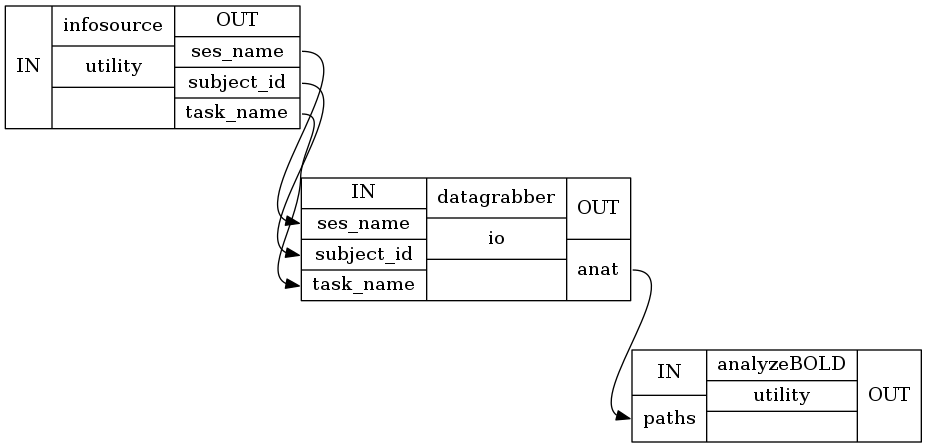

In [13]:
wf3.write_graph(dotfilename='select_data_flat.dot' , graph2use='flat')
Image('/home/neuro/Result/Nipype_tutorial/working_dir/select_data/select_data_flat_detailed.png')

In [14]:
wf3.run()

211102-16:50:39,350 nipype.workflow INFO:
	 Workflow select_data settings: ['check', 'execution', 'logging', 'monitoring']
211102-16:50:39,371 nipype.workflow INFO:
	 Running serially.
211102-16:50:39,371 nipype.workflow INFO:
	 [Node] Setting-up "select_data.datagrabber" in "/tmp/tmph7s8vv3j/datagrabber".
211102-16:50:39,374 nipype.workflow INFO:
	 [Node] Running "datagrabber" ("nipype.interfaces.io.DataGrabber")
211102-16:50:39,377 nipype.workflow INFO:
	 [Node] Finished "select_data.datagrabber".
211102-16:50:39,377 nipype.workflow INFO:
	 [Node] Setting-up "select_data.analyzeBOLD" in "/home/neuro/Result/Nipype_tutorial/working_dir/select_data/_ses_name_test_subject_id_2_task_name_fingerfootlips/analyzeBOLD".
211102-16:50:39,428 nipype.workflow INFO:
	 [Node] Running "analyzeBOLD" ("nipype.interfaces.utility.wrappers.Function")


analyzing /home/neuro/Data/ds000114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz


211102-16:50:39,453 nipype.workflow INFO:
	 [Node] Finished "select_

### Exercise 1
Grab T1w images from both sessions - ``ses-test`` and ``ses-retest`` for ``sub-01``.

In [116]:
# write your solution here
from nipype import Node, DataGrabber

select_data_node = Node(DataGrabber(infields=['subject_id', 'ses_name', 'scan_name'], 
                                    outfields=['anat'],
                                    base_directory='/home/neuro/Data/ds000114'), 
                        name='datagrabber' )

select_data_node.inputs.field_template = {'anat':'sub-%02d/ses-%s/%s/*_T1w.nii.gz'}
select_data_node.inputs.template_args = {'anat': [['subject_id', 'ses_name', 'scan_name']]}
select_data_node.inputs.template = '*'
select_data_node.inputs.sort_filelist = True
select_data_node.inputs.subject_id = 1
select_data_node.inputs.ses_name = ['test','retest']
select_data_node.inputs.scan_name = 'anat'

In [117]:
select_data_node.run().outputs

211102-14:39:20,750 nipype.workflow INFO:
	 [Node] Setting-up "datagrabber" in "/tmp/tmpsdgb2pdy/datagrabber".
211102-14:39:20,753 nipype.workflow INFO:
	 [Node] Running "datagrabber" ("nipype.interfaces.io.DataGrabber")
211102-14:39:20,760 nipype.workflow INFO:
	 [Node] Finished "datagrabber".



anat = ['/home/neuro/Data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-01/ses-retest/anat/sub-01_ses-retest_T1w.nii.gz']

In [ ]:
from nipype import DataGrabber, Node

# Create DataGrabber node
ex1_dg = Node(DataGrabber(infields=['subject_id', 'ses_name'],
                      outfields=['anat']),
          name='datagrabber')

# Location of the dataset folder
ex1_dg.inputs.base_directory = '/data/ds000114'

# Necessary default parameters
ex1_dg.inputs.template = '*'
ex1_dg.inputs.sort_filelist = True

# specify the template
ex1_dg.inputs.template_args = {'anat': [['subject_id', 'ses_name']]}
ex1_dg.inputs.field_template = {'anat': 'sub-%02d/ses-%s/anat/*_T1w.nii.gz'}

# specify subject_id and ses_name you're interested in
ex1_dg.inputs.subject_id = 1
ex1_dg.inputs.ses_name = ["test", "retest"]

# and run the node
ex1_res = ex1_dg.run()

In [ ]:
# you can now check the output
ex1_res.outputs

# SelectFiles

`SelectFiles` is a more flexible alternative to `DataGrabber`. It is built on Python [format strings](http://docs.python.org/2/library/string.html#format-string-syntax), which are similar to the Python string interpolation feature you are likely already familiar with, but advantageous in several respects. Format strings allow you to replace named sections of template strings set off by curly braces (`{}`), possibly filtered through a set of functions that control how the values are rendered into the string. As a very basic example, we could write

In [118]:
msg = "This workflow uses {package}."

and then format it with keyword arguments:

In [119]:
print(msg.format(package="FSL"))

This workflow uses FSL.


`SelectFiles` uses the {}-based string formatting syntax to plug values into string templates and collect the data. These templates can also be combined with glob wild cards. The field names in the formatting template (i.e. the terms in braces) will become inputs fields on the interface, and the keys in the templates dictionary will form the output fields.

Let's focus again on the data we want to import:

    anat = /data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz
    func = /data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz
    
Now, we can replace those paths with the according {}-based strings.

    anat = /data/ds000114/sub-{subject_id}/ses-{ses_name}/anat/sub-{subject_id}_ses-{ses_name}_T1w.nii.gz
    func = /data/ds000114/sub-{subject_id}/ses-{ses_name}/func/ \
            sub-{subject_id}_ses-{ses_name}_task-{task_name}_bold.nii.gz

How would this look like as a `SelectFiles` node?

In [120]:
from nipype import SelectFiles, Node

# String template with {}-based strings
templates = {'anat': 'sub-{subject_id}/ses-{ses_name}/anat/sub-{subject_id}_ses-{ses_name}_T1w.nii.gz',
             'func': 'sub-{subject_id}/ses-{ses_name}/func/sub-{subject_id}_ses-{ses_name}_task-{task_name}_bold.nii.gz'}

# Create SelectFiles node
sf = Node(SelectFiles(templates),
          name='selectfiles')

# Location of the dataset folder
sf.inputs.base_directory = '/home/neuro/Data/ds000114'

# Feed {}-based placeholder strings with values
sf.inputs.subject_id = '01'
sf.inputs.ses_name = "test"
sf.inputs.task_name = 'fingerfootlips'

Let's check if we get what we wanted.

In [121]:
sf.run().outputs

211102-14:46:31,108 nipype.workflow INFO:
	 [Node] Setting-up "selectfiles" in "/tmp/tmpxz35c_u9/selectfiles".
211102-14:46:31,111 nipype.workflow INFO:
	 [Node] Running "selectfiles" ("nipype.interfaces.io.SelectFiles")
211102-14:46:31,117 nipype.workflow INFO:
	 [Node] Finished "selectfiles".



anat = /home/neuro/Data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz
func = /home/neuro/Data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz

Perfect! But why is `SelectFiles` more flexible than `DataGrabber`? First, you perhaps noticed that with the {}-based string, we can reuse the same input (e.g. `subject_id`) multiple time in the same string, without feeding it multiple times into the template.

Additionally, you can also select multiple files without the need of an iterable node. For example, let's assume we want to select anatomical images for all subjects at once. We can do this by using the eildcard ``*`` in a template:

    'sub-*/anat/sub-*_T1w.nii.gz'

Let's see how this works:

In [126]:
from nipype import SelectFiles, Node

# String template with {}-based strings
templates = {'anat': 'sub-*/ses-{ses_name}/anat/sub-*_ses-{ses_name}_T1w.nii.gz'}


# Create SelectFiles node
sf = Node(SelectFiles(templates, force_lists=["anat"]),
          name='selectfiles')

# Location of the dataset folder
sf.inputs.base_directory = '/home/neuro/Data/ds000114'

# Feed {}-based placeholder strings with values
sf.inputs.ses_name = 'test'

# Print SelectFiles output
sf.run().outputs

211102-14:52:01,110 nipype.workflow INFO:
	 [Node] Setting-up "selectfiles" in "/tmp/tmp48ookzsq/selectfiles".
211102-14:52:01,112 nipype.workflow INFO:
	 [Node] Running "selectfiles" ("nipype.interfaces.io.SelectFiles")
211102-14:52:01,116 nipype.workflow INFO:
	 [Node] Finished "selectfiles".



anat = ['/home/neuro/Data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-03/ses-test/anat/sub-03_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-04/ses-test/anat/sub-04_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-05/ses-test/anat/sub-05_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-06/ses-test/anat/sub-06_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-07/ses-test/anat/sub-07_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-08/ses-test/anat/sub-08_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-09/ses-test/anat/sub-09_ses-test_T1w.nii.gz', '/home/neuro/Data/ds000114/sub-10/ses-test/anat/sub-10_ses-test_T1w.nii.gz']

As you can see, now `anat` contains ten file paths, T1w images for all ten subject. 

As a side note, you could also use ``[]`` string formatting for some simple cases, e.g. for loading only subject 1 and 2: 

    'sub-0[1,2]/ses-test/anat/sub-0[1,2]_ses-test_T1w.nii.gz'

### `force_lists`

There's an additional parameter, `force_lists`, which controls how `SelectFiles` behaves in cases where only a single file matches the template. The default behavior is that when a template matches multiple files they are returned as a list, while a single file is returned as a string. There may be situations where you want to force the outputs to always be returned as a list (for example, you are writing a workflow that expects to operate on several runs of data, but some of your subjects only have a single run). In this case, `force_lists` can be used to tune the outputs of the interface. You can either use a boolean value, which will be applied to every output the interface has, or you can provide a list of the output fields that should be coerced to a list.

Returning to our previous example, you may want to ensure that the `anat` files are returned as a list, but you only ever will have a single `T1` file. In this case, you would do

In [123]:
sf = SelectFiles(templates, force_lists=["anat"])

### Exercise 2
Use ``SelectFile`` to select again T1w images from both sessions - ``ses-test`` and ``ses-retest`` for ``sub-01``.

In [3]:
# write your solution here
from nipype import Node, SelectFiles, IdentityInterface, Workflow, Function

template = {'anat':'sub-{id}/ses-*/anat/*T1w*.nii.gz'}
id_list = ['01', '02']

def printMe(paths):
    print("\n\nanalyzing " + str(paths) + "\n\n")
    
analyzeBOLD = Node(Function(function=printMe, input_names=["paths"],
                            output_names=[]), name="analyzeBOLD")
Ex2 = Node(SelectFiles(template, base_directory='/home/neuro/Data/ds000114'), name='Exercise2')
select_node = Node(IdentityInterface(fields=['id']), name='selection')
select_node.iterables = [('id', id_list)]

wf4 = Workflow(base_dir='/home/neuro/Result/Nipype_tutorial/working_dir', name='Exercise2_selection_module')

wf4.connect([(select_node, Ex2, [('id', 'id')]),
             (Ex2, analyzeBOLD, [('anat', 'paths')])])

wf4.run()

211102-16:44:21,265 nipype.workflow INFO:
	 Workflow Exercise2_selection_module settings: ['check', 'execution', 'logging', 'monitoring']
211102-16:44:21,286 nipype.workflow INFO:
	 Running serially.
211102-16:44:21,287 nipype.workflow INFO:
	 [Node] Setting-up "Exercise2_selection_module.Exercise2" in "/home/neuro/Result/Nipype_tutorial/working_dir/Exercise2_selection_module/_id_02/Exercise2".
211102-16:44:21,292 nipype.workflow INFO:
	 [Node] Outdated cache found for "Exercise2_selection_module.Exercise2".
211102-16:44:21,329 nipype.workflow INFO:
	 [Node] Running "Exercise2" ("nipype.interfaces.io.SelectFiles")
211102-16:44:21,351 nipype.workflow INFO:
	 [Node] Finished "Exercise2_selection_module.Exercise2".
211102-16:44:21,352 nipype.workflow INFO:
	 [Node] Setting-up "Exercise2_selection_module.analyzeBOLD" in "/home/neuro/Result/Nipype_tutorial/working_dir/Exercise2_selection_module/_id_02/analyzeBOLD".
211102-16:44:21,394 nipype.workflow INFO:
	 [Node] Running "analyzeBOLD" ("n

In [ ]:
from nipype import SelectFiles, Node

# String template with {}-based strings
templates = {'anat': 'sub-01/ses-*/anat/sub-01_ses-*_T1w.nii.gz'}
             

# Create SelectFiles node
sf = Node(SelectFiles(templates),
          name='selectfiles')

# Location of the dataset folder
sf.inputs.base_directory = '/data/ds000114'

#sf.inputs.ses_name = 

sf.run().outputs

## FreeSurferSource

`FreeSurferSource` is a specific case of a file grabber that facilitates the data import of outputs from the FreeSurfer recon-all algorithm. This, of course, requires that you've already run `recon-all` on your subject.

For the tutorial dataset ``ds000114``, `recon-all` was already run. So, let's make sure that you have the anatomy output of one subject on your system:

Now, before you can run `FreeSurferSource`, you first have to specify the path to the FreeSurfer output folder, i.e. you have to specify the SUBJECTS_DIR variable. This can be done as follows:

In [138]:
from nipype.interfaces.freesurfer import FSCommand
from os.path import abspath as opap

# Path to your freesurfer output folder
fs_dir = opap('/home/neuro/Data/ds000114/derivatives/freesurfer/')

# Set SUBJECTS_DIR
FSCommand.set_default_subjects_dir(fs_dir)

To create the `FreeSurferSource` node, do as follows:

In [139]:
from nipype import Node
from nipype.interfaces.io import FreeSurferSource

# Create FreeSurferSource node
fssource = Node(FreeSurferSource(subjects_dir=fs_dir),
                name='fssource')

Let's now run it for a specific subject.

In [140]:
fssource.inputs.subject_id = 'sub-01'
result = fssource.run() 

211102-15:53:31,848 nipype.workflow INFO:
	 [Node] Setting-up "fssource" in "/tmp/tmpr1l3bqyy/fssource".
211102-15:53:31,850 nipype.workflow INFO:
	 [Node] Running "fssource" ("nipype.interfaces.io.FreeSurferSource")
211102-15:53:32,77 nipype.workflow INFO:
	 [Node] Finished "fssource".


Did it work? Let's try to access multiple FreeSurfer outputs:

In [141]:
print('aparc_aseg: %s\n' % result.outputs.aparc_aseg)
print('inflated: %s\n' % result.outputs.inflated)

aparc_aseg: ['/home/neuro/Data/ds000114/derivatives/freesurfer/sub-01/mri/aparc+aseg.mgz', '/home/neuro/Data/ds000114/derivatives/freesurfer/sub-01/mri/aparc.a2009s+aseg.mgz', '/home/neuro/Data/ds000114/derivatives/freesurfer/sub-01/mri/aparc.dktatlas+aseg.mgz']

inflated: ['/home/neuro/Data/ds000114/derivatives/freesurfer/sub-01/surf/lh.inflated', '/home/neuro/Data/ds000114/derivatives/freesurfer/sub-01/surf/rh.inflated']



It seems to be working as it should. But as you can see, the `inflated` output actually contains the file location for both hemispheres. With `FreeSurferSource` we can also restrict the file selection to a single hemisphere. To do this, we use the `hemi` input filed:

In [142]:
fssource.inputs.hemi = 'lh'
result = fssource.run()

211102-15:56:20,331 nipype.workflow INFO:
	 [Node] Setting-up "fssource" in "/tmp/tmpr1l3bqyy/fssource".
211102-15:56:20,334 nipype.workflow INFO:
	 [Node] Running "fssource" ("nipype.interfaces.io.FreeSurferSource")
211102-15:56:20,346 nipype.workflow INFO:
	 [Node] Finished "fssource".


Let's take a look again at the `inflated` output.

In [143]:
result.outputs.inflated

'/home/neuro/Data/ds000114/derivatives/freesurfer/sub-01/surf/lh.inflated'

Perfect!